# Machine Learning and Data Mining: Lab 06
---------------

## Exercise 1: Metrics

Assume we have a multi-label classification task. `y_gt` is the ground-truth data, `y_pr` the prediction from a given classifier

In [79]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_gt = np.array([0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2])
y_pr = np.array([0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2])

#### (a) Plot the confusion matrix using `seaborn` and `sklearn`

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_gt, y_pr)
print(cf_matrix)

[[5 2 0]
 [0 6 2]
 [2 1 6]]


<AxesSubplot:>

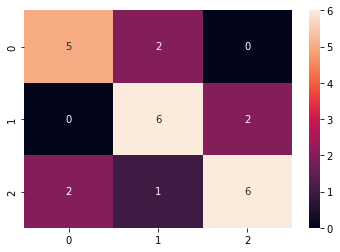

In [81]:
sns.heatmap(cf_matrix, annot=True)

#### (b) Implement your own function to calculate the accuracy

In [84]:
def calcAccuracy(expectation, prediction):
    count = 0
    for i in range(len(prediction)):
        if(expectation[i] == prediction[i]):
            count += 1
    return count / len(prediction)

print(calcAccuracy(y_gt, y_pr))

0.7083333333333334


In [85]:
# For comparison
from sklearn.metrics import accuracy_score
accuracy_score(y_gt, y_pr)

0.7083333333333334

#### (c) Implement your own functions to calculate the precision, recall and f-score
For simplicity, we work with binary predictions

In [86]:
y_gt = np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])
y_pr = np.array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

[[7 5]
 [4 8]]


<AxesSubplot:>

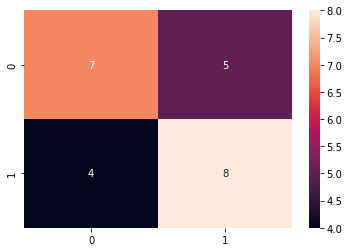

In [87]:
cf_matrix = confusion_matrix(y_gt, y_pr)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [88]:
#P_pos = true Positive / (true Positive + false positive)
def calcPrecision(expectation, prediction):
    cf_matrix = confusion_matrix(expectation, prediction)
    true_Positive = cf_matrix[1][1]
    false_Positive = true_Positive + cf_matrix[0][1]
    return true_Positive / false_Positive

print(calcPrecision(y_gt, y_pr))

0.6153846153846154


In [89]:
#R-pos = true Positives / all positives Documents
def calcRecall(expectation, prediction):
    cf_matrix = confusion_matrix(expectation, prediction)
    true_Positive = cf_matrix[1][1]
    all_Positive_Doc = cf_matrix[1][0] + cf_matrix[1][1]
    return true_Positive / all_Positive_Doc

print(calcRecall(y_gt, y_pr))

0.6666666666666666


In [90]:
##f = 2 * ((precision * recall) / (precision + recall))
def calcFscore(expectation, prediction):
    return 2 * ((calcPrecision(expectation, prediction) * calcRecall(expectation, prediction))/(calcPrecision(expectation, prediction)+calcRecall(expectation, prediction)))
print(calcFscore(y_gt, y_pr))

0.64


In [91]:
# For comparison
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_gt, y_pr)}")
print(f"Recall: {recall_score(y_gt, y_pr)}")
print(f"F1-Score: {f1_score(y_gt, y_pr)}")

Precision: 0.6153846153846154
Recall: 0.6666666666666666
F1-Score: 0.64


---
## Exercise 2: Kappa Measure
#### 5 persons provided their rating for the different countries. Implement the kappa function to calculate the rater agreement between all of them.

In [105]:
from collections import Counter

# Hint if you have a dict, for example...
my_dict = {'value_1': 'yes', 'value_2': 'yes', 'value_3': 'yes', 'value_4': 'no'}

# you can use collections.Counter to count values, e.g.
print(Counter(my_dict.values()))
print(Counter(my_dict.values())['yes'])

Counter({'yes': 3, 'no': 1})
3


In [120]:
# TODO: implement the calculation of the kappa value.
def kappa(rater1, rater2):
    shared_dictSame = {}
    shared_dictNSame = {}
    for i in rater1:
        if (i in rater2) and (rater1[i] == rater2[i]):
            shared_dictSame[i] = rater1[i]
            
    for i in rater1:
        if (i in rater2) and (rater1[i] != rater2[i]):
            shared_dictNSame[i] = rater1[i]
            
            
    rater12counterYes = Counter(shared_dictSame.values())['Yes']
    rater12counterNo =  Counter(shared_dictSame.values())['No']
    rater12counterNotYes = Counter(shared_dictNSame.values())['Yes']
    rater12counterNotNo =  Counter(shared_dictNSame.values())['No'] 
    
    nenner = (rater12counterYes + rater12counterNo + rater12counterNotYes + rater12counterNotNo)
    p0 = (rater12counterYes + rater12counterNo) / nenner
    pYes = ((rater12counterYes + rater12counterNotYes) / nenner) * ((rater12counterYes + rater12counterNotNo) / nenner)
    pNo = ((rater12counterNo + rater12counterNotYes) / nenner) * ((rater12counterNo + rater12counterNotNo) / nenner)
    pe = pYes + pNo
    
    k = (p0 - pe) / (1 - pe)
    return k 

# start of the kappa calculation. All raters are compared against each other.
def runKappa():
    counter = 0
    rater1 = {'Germany': 'Yes', 'Brazil': 'Yes', 'Argentina': 'Yes', 'France': 'Yes', 'Italy': 'Yes', 'Uruguay': 'Yes', 'England': 'Yes', 'Spanien': 'Yes', 'Albanien': 'No', 'Schweiz': 'No', 'Schweden': 'No',
    'Norway': 'No', 'Russia': 'No', 'Greece': 'No', 'Portugal': 'No', 'USA': 'No', 'Panama': 'No',
    'Colombia': 'No', 'Australia': 'No', 'Croatia': 'No', 'Austria': 'No', 'Poland': 'No', 'Hungary': 'No'}
    rater2 = {'Germany': 'Yes', 'Brazil': 'Yes', 'Argentina': 'Yes', 'France': 'Yes', 'Italy': 'Yes', 'Uruguay': 'Yes', 'England': 'Yes', 'Spanien': 'Yes', 'Albanien': 'No', 'Schweiz': 'No', 'Schweden': 'No',
    'Norway': 'No', 'Russia': 'No', 'Greece': 'No', 'Portugal': 'No', 'USA': 'No', 'Panama': 'No',
    'Colombia': 'No', 'Australia': 'No', 'Croatia': 'No', 'Austria': 'No', 'Poland': 'No', 'Hungary': 'No'}
    rater3 = {'Germany': 'No', 'Brazil': 'Yes', 'Argentina': 'Yes', 'France': 'Yes', 'Italy': 'Yes', 'Uruguay': 'Yes', 'England': 'Yes', 'Spanien': 'Yes', 'Albanien': 'No', 'Schweiz': 'No', 'Schweden': 'No',
    'Norway': 'No', 'Russia': 'No', 'Greece': 'No', 'Portugal': 'No', 'USA': 'No', 'Panama': 'No',
    'Colombia': 'No', 'Australia': 'No', 'Croatia': 'No', 'Austria': 'No', 'Poland': 'No', 'Hungary': 'No'}
    rater4 = {'Germany': 'No', 'Brazil': 'No', 'Argentina': 'Yes', 'France': 'Yes', 'Italy': 'Yes', 'Uruguay': 'Yes', 'England': 'Yes', 'Spanien': 'Yes', 'Albanien': 'Yes', 'Schweiz': 'Yes', 'Schweden': 'No',
    'Norway': 'No', 'Russia': 'No', 'Greece': 'No', 'Portugal': 'No', 'USA': 'No', 'Panama': 'No',
    'Colombia': 'No', 'Australia': 'No', 'Croatia': 'No', 'Austria': 'No', 'Poland': 'No', 'Hungary': 'No'}
    rater5 = {'Germany': 'No', 'Brazil': 'No', 'Argentina': 'No', 'France': 'No', 'Italy': 'Yes', 'Uruguay': 'Yes', 'England': 'Yes', 'Spanien': 'Yes', 'Albanien': 'Yes', 'Schweiz': 'Yes', 'Schweden': 'Yes',
    'Norway': 'Yes', 'Russia': 'No', 'Greece': 'No', 'Portugal': 'No', 'USA': 'No', 'Panama': 'No',
    'Colombia': 'No', 'Australia': 'No', 'Croatia': 'No', 'Austria': 'No', 'Poland': 'No', 'Hungary': 'No'}
    

    print("Kappa (rater1, rater2): " + str(kappa(rater1, rater2)))
    print("Kappa (rater1, rater3): " + str(kappa(rater1, rater3)))
    print("Kappa (rater1, rater4): " + str(kappa(rater1, rater4)))
    print("Kappa (rater1, rater5): " + str(kappa(rater1, rater5)))
    print("Kappa (rater2, rater3): " + str(kappa(rater2, rater3)))
    print("Kappa (rater2, rater4): " + str(kappa(rater2, rater4)))
    print("Kappa (rater2, rater5): " + str(kappa(rater2, rater5)))
    print("Kappa (rater3, rater4): " + str(kappa(rater3, rater4)))
    print("Kappa (rater3, rater5): " + str(kappa(rater3, rater5)))
    print("Kappa (rater4, rater5): " + str(kappa(rater4, rater5)))

runKappa()

Kappa (rater1, rater2): 1.0
Kappa (rater1, rater3): 0.9012875536480688
Kappa (rater1, rater4): 0.6166666666666667
Kappa (rater1, rater5): 0.23333333333333336
Kappa (rater2, rater3): 0.9012875536480688
Kappa (rater2, rater4): 0.6166666666666667
Kappa (rater2, rater5): 0.23333333333333336
Kappa (rater3, rater4): 0.7038626609442059
Kappa (rater3, rater5): 0.3090128755364806
Kappa (rater4, rater5): 0.6166666666666667


---

## Exercise 3: Linear Regression

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### (a) Make a scatter plot of the data. Show the pH-value on the y-axis and the alcohol value on the x-axis

#### (b) Implement your own class `LinearRegression`. This class must have at least a method `fit(self,x,y)` to calculate the regression parameters and a method `predict(self,x)` to predict unseen values

In [15]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.a = 0
        self.b = 1
        
    def predict(self,x):
        # return a + b * x
        pass
    
    def fit(self,x,y):
        # b = sum((x-x_avg)*(y-y_avg)) / sum((x-x_avg)^2)
        pass

In [16]:
reg = LinearRegression()
reg.fit(df.alcohol, df.pH)
pH_predict = reg.predict(df.alcohol)

#### (c) Plot the result: Copy the scatter plot from above. Additionally, plot the prediction as red line in the same figure

#### (d) Print the slope, the intercept and the prediction for `alcohol=7` as well as for `alcohol=16`

#### (e) Implement the Linear Regression with gradient descent and plot the result

In [19]:
from random import randrange
class LinearRegressionGD:
    def __init__(self, a0 = 0, b0 = 1):
        self.a = a0
        self.b = b0
        
    def predict(self,x):
        # return a + b * x
        pass
    
    def fit(self,x,y, epochs = 100000, learning_rate = 0.01):
        for _ in range(epochs):
            index = randrange(0, len(x))
            # a = a + (learning_rate * (y - y_pred))
            # b = b + (learning_rate * x * (y - y_pred))
            
            # ... TODO ...
            
reg = LinearRegressionGD(a0 = 3, b0=0)
reg.fit(df.alcohol, df.pH)
pH_predict = reg.predict(df.alcohol)

---
## Exercise 4: Multivariate Linear Regression
#### (a) Implement the multivariate linear regression 

In [22]:
class MultivariateLinearRegression:
    def __init__(self):
        pass
        
    def predict(self,X):
        # return X * b
        pass
    
    def fit(self,X,y):
        # b = (X.T * X)^(-1) * (X.T * y)
        pass

#### (b) Implement a function which returns the Mean Square Error

In [1]:
def mse(y_true, y_predict):
    pass

#### (c) Calculate the MSE between all combination of two attributes - Which combination leads to the lowest MSE?